In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Proteomics

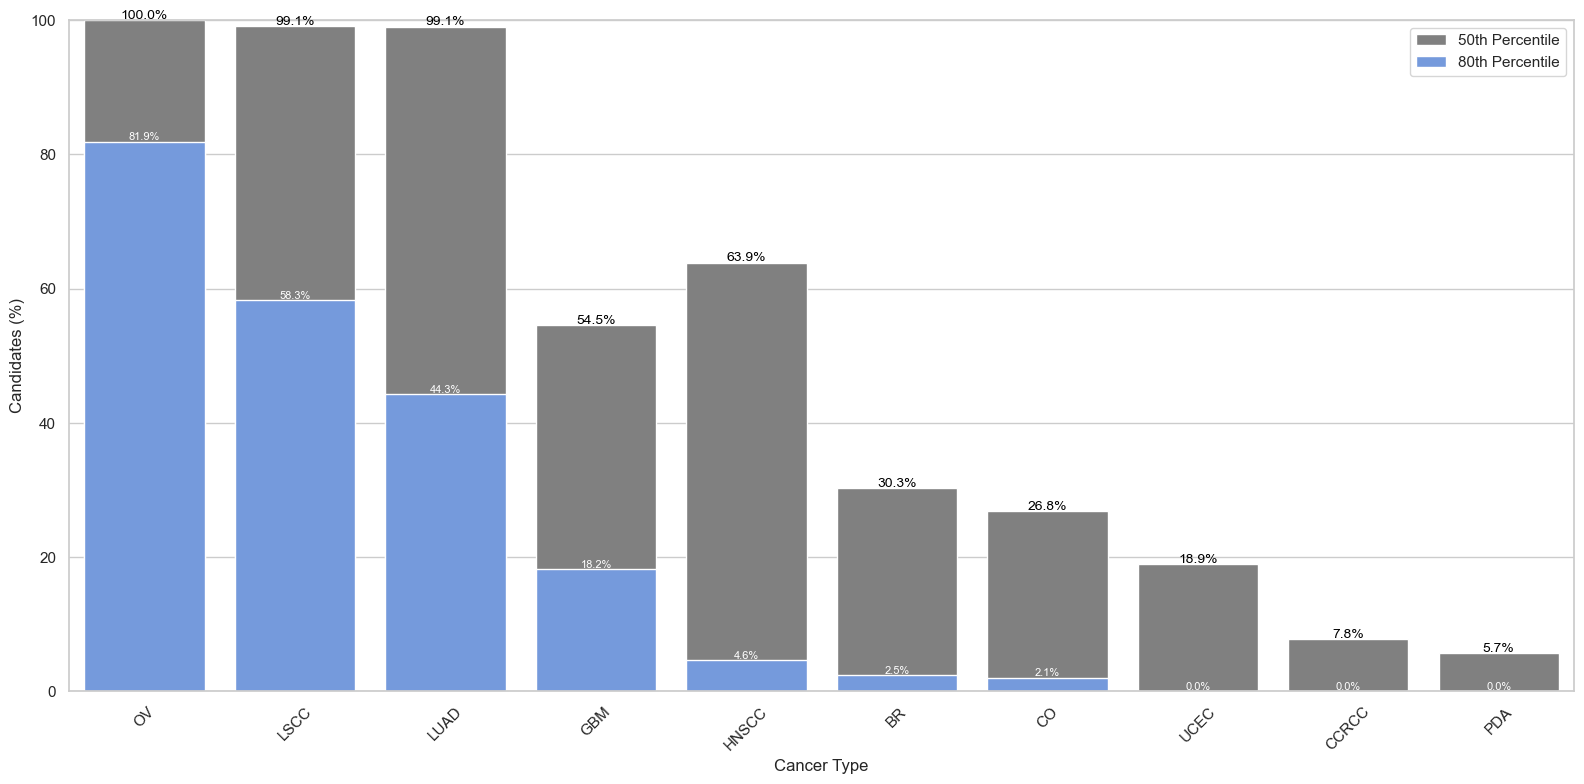

In [7]:
## read proteomics data
data = pd.read_csv('./data/proteomics_data.tsv', sep='\t')

## calculate 50th and 80th overall percentiles
overall_80th = data['overall_score'].quantile(0.8)
overall_50th = data['overall_score'].quantile(0.5)

## filter data by overall percentiles
percentile80_data = data[(data['overall_score'] >= overall_80th)]
percentile50_data = data[(data['overall_score'] >= overall_50th)]

## count cancer occurrences
count_80 = percentile80_data['tumor_code'].value_counts().reset_index(name='count_80')
count_50 = percentile50_data['tumor_code'].value_counts().reset_index(name='count_50')
total_counts = data['tumor_code'].value_counts().reset_index(name='total_count')

count_80.columns = ['tumor_code', 'count_80']
count_50.columns = ['tumor_code', 'count_50']
total_counts.columns = ['tumor_code', 'total_count']

## merge counts
count_data = pd.merge(total_counts, count_50, on='tumor_code', how='left').fillna(0)
count_data = pd.merge(count_data, count_80, on='tumor_code', how='left').fillna(0)

## calculate percentages based on total patients per cancer type
count_data['percentage_50'] = (count_data['count_50'] / count_data['total_count']) * 100
count_data['percentage_80'] = (count_data['count_80'] / count_data['total_count']) * 100

## sort by decreasing frequency
count_data = count_data.sort_values(by='percentage_50', ascending=False).reset_index(drop=True)
count_data = count_data.sort_values(by='percentage_80', ascending=False).reset_index(drop=True)

## set style
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16, 8))

## plot
bars_50 = sns.barplot(data=count_data, x='tumor_code', y='percentage_50', color='grey', label='50th Percentile')
bars_80 = sns.barplot(data=count_data, x='tumor_code', y='percentage_80', color='cornflowerblue', label='80th Percentile')

## add labels 
for index, row in count_data.iterrows():
        plt.text(index, row['percentage_80'] + 0.2, f"{row['percentage_80']:.1f}%", ha='center', color='white', fontdict={"size":8})
        plt.text(index, row['percentage_50'] + 0.2, f"{row['percentage_50']:.1f}%", ha='center', color='black', fontdict={"size":10})

## define labels and title
plt.xlabel('Cancer Type')
plt.xticks(rotation=45)
plt.ylabel('Candidates (%)')
plt.ylim(0, 100)
plt.legend()

## adjust layout
plt.tight_layout()

## save figure
plt.savefig('./figures/figure_2_proteomics.png')
plt.show()

#### Transcriptomics

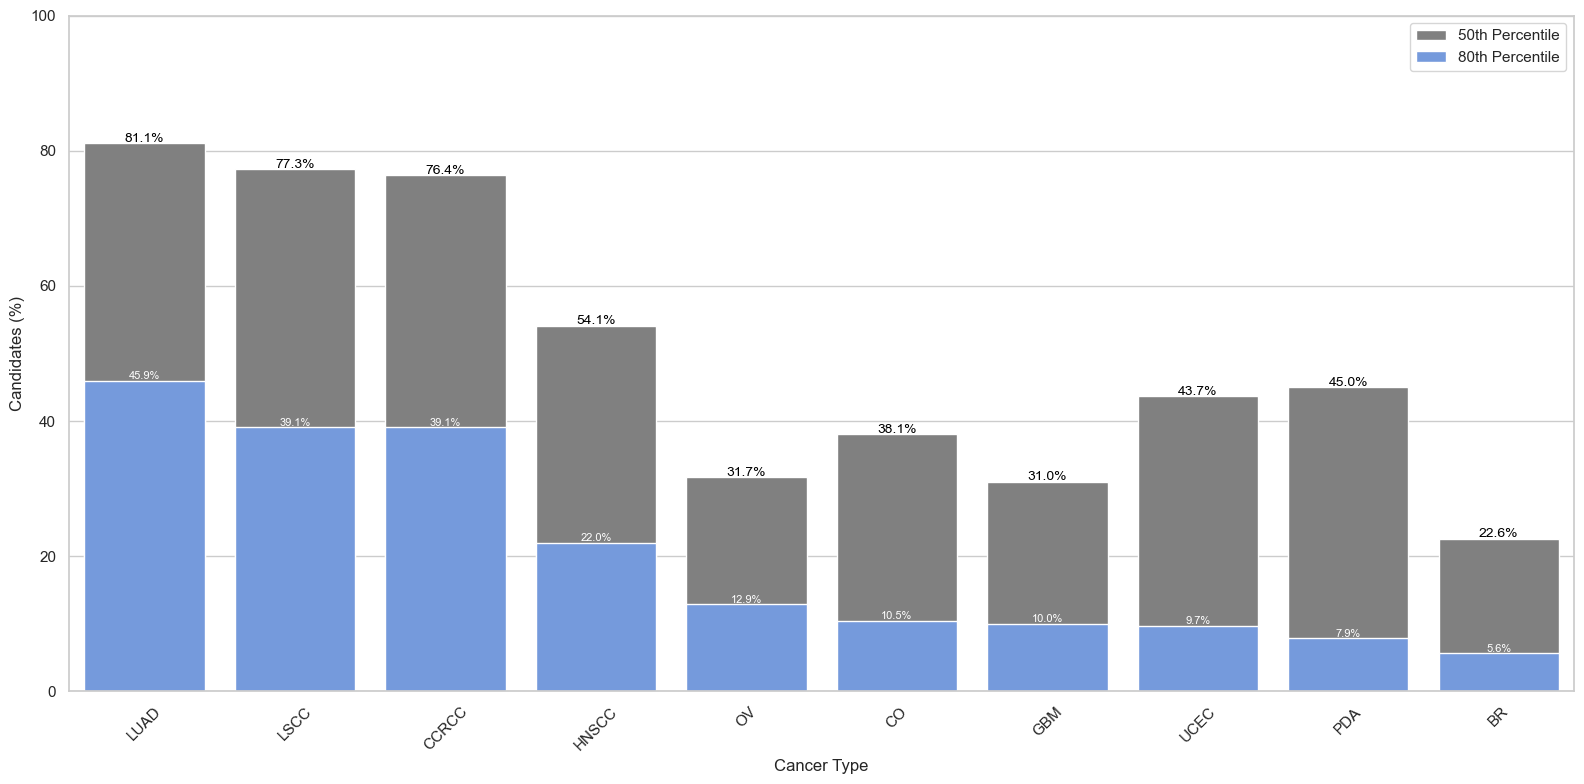

In [8]:
## read transcriptomics data
data = pd.read_csv('./data/transcriptomics_data.tsv', sep='\t')

## calculate 50th and 80th overall percentiles
overall_80th = data['overall_score'].quantile(0.8)
overall_50th = data['overall_score'].quantile(0.5)

## filter data by overall percentiles
percentile80_data = data[(data['overall_score'] >= overall_80th)]
percentile50_data = data[(data['overall_score'] >= overall_50th)]

## count cancer occurrences
count_80 = percentile80_data['tumor_code'].value_counts().reset_index(name='count_80')
count_50 = percentile50_data['tumor_code'].value_counts().reset_index(name='count_50')
total_counts = data['tumor_code'].value_counts().reset_index(name='total_count')

count_80.columns = ['tumor_code', 'count_80']
count_50.columns = ['tumor_code', 'count_50']
total_counts.columns = ['tumor_code', 'total_count']

## merge counts
count_data = pd.merge(total_counts, count_50, on='tumor_code', how='left').fillna(0)
count_data = pd.merge(count_data, count_80, on='tumor_code', how='left').fillna(0)

## calculate percentages based on total patients per cancer type
count_data['percentage_50'] = (count_data['count_50'] / count_data['total_count']) * 100
count_data['percentage_80'] = (count_data['count_80'] / count_data['total_count']) * 100

## sort by decreasing frequency
count_data = count_data.sort_values(by='percentage_50', ascending=False).reset_index(drop=True)
count_data = count_data.sort_values(by='percentage_80', ascending=False).reset_index(drop=True)

## set style
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16, 8))

## plot
bars_50 = sns.barplot(data=count_data, x='tumor_code', y='percentage_50', color='grey', label='50th Percentile')
bars_80 = sns.barplot(data=count_data, x='tumor_code', y='percentage_80', color='cornflowerblue', label='80th Percentile')

## add labels 
for index, row in count_data.iterrows():
        plt.text(index, row['percentage_80'] + 0.2, f"{row['percentage_80']:.1f}%", ha='center', color='white', fontdict={"size":8})
        plt.text(index, row['percentage_50'] + 0.2, f"{row['percentage_50']:.1f}%", ha='center', color='black', fontdict={"size":10})

## define labels and title
plt.xlabel('Cancer Type')
plt.xticks(rotation=45)
plt.ylabel('Candidates (%)')
plt.ylim(0, 100)
plt.legend()

## adjust layout
plt.tight_layout()

## save figure
plt.savefig('./figures/figure_2_transcriptomics.png')
plt.show()